<a href="https://colab.research.google.com/github/GitHub-alp21/game-economy-analysis-lien-quan/blob/main/Game_Economy_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving skin_lienquan_500.csv to skin_lienquan_500.csv


In [2]:
import pandas as pd

df = pd.read_csv("skin_lienquan_500.csv")
df.head()
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tên tướng     500 non-null    object
 1   Tên skin      500 non-null    object
 2   Bậc           500 non-null    object
 3   Giá quân huy  500 non-null    int64 
 4   Cách sở hữu   500 non-null    object
 5   Mã skin       500 non-null    object
dtypes: int64(1), object(5)
memory usage: 23.6+ KB


,0
Tên tướng,0
Tên skin,0
Bậc,0
Giá quân huy,0
Cách sở hữu,0
Mã skin,0


<Axes: title={'center': 'Số lượng Skin theo Bậc'}, xlabel='Bậc', ylabel='Số lượng'>

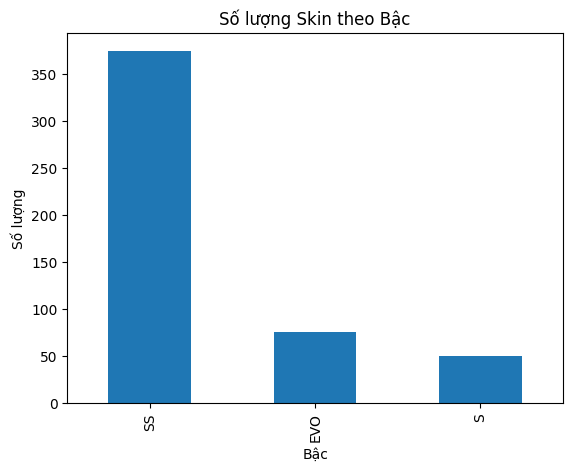

In [3]:
df["Bậc"].value_counts().plot(kind="bar", title="Số lượng Skin theo Bậc", ylabel="Số lượng")


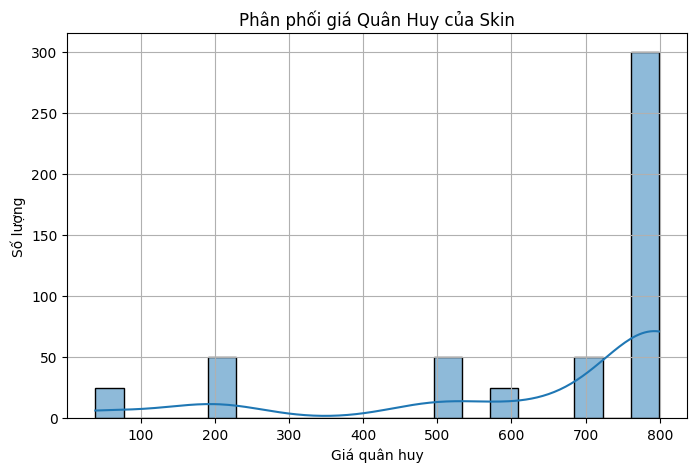

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.histplot(df["Giá quân huy"], bins=20, kde=True)
plt.title("Phân phối giá Quân Huy của Skin")
plt.xlabel("Giá quân huy")
plt.ylabel("Số lượng")
plt.grid(True)
plt.show()


In [5]:
# Giả lập 3 nhóm người chơi
f2p = df[df["Bậc"] == "S"].sample(5, random_state=1)
mid = df[df["Bậc"].isin(["S", "SS"])].sample(20, random_state=2)
whale = df[df["Bậc"].isin(["SS", "EVO"])]

print("F2P:", f2p["Giá quân huy"].sum())
print("Mid-spender:", mid["Giá quân huy"].sum())
print("Whale:", whale["Giá quân huy"].sum())


F2P: 2495
Mid-spender: 14380
Whale: 300550


<Axes: title={'center': 'Tổng chi quân huy theo Tướng'}, xlabel='Tên tướng'>

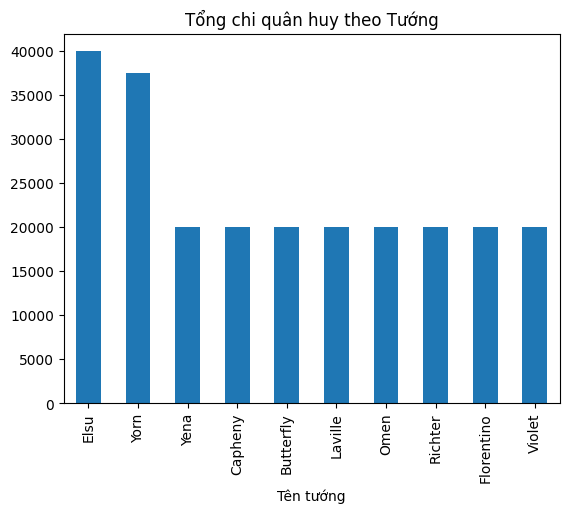

In [6]:
df.groupby("Tên tướng")["Giá quân huy"].sum().sort_values(ascending=False).head(10).plot(kind="bar", title="Tổng chi quân huy theo Tướng")


## Insight 1: Giá skin bậc cao vượt trội so với bậc thấp
## Insight 1: Premium skins are significantly more expensive

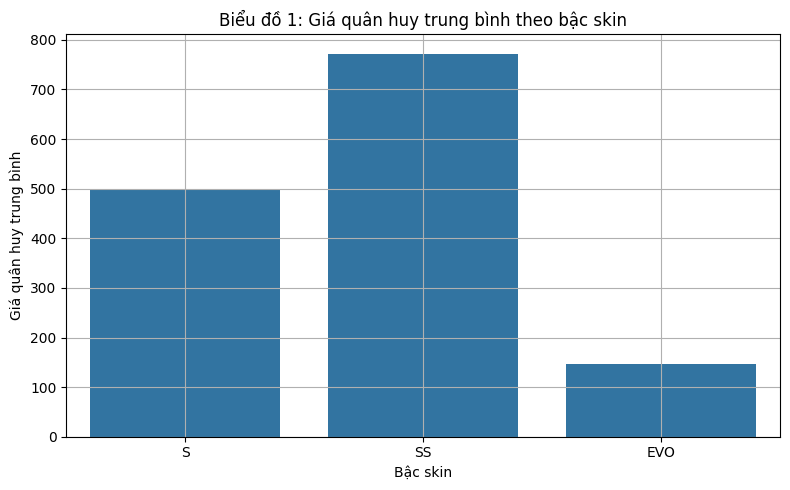

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tính giá trung bình theo bậc
price_by_grade = df.groupby("Bậc")["Giá quân huy"].mean().reset_index()

# Vẽ biểu đồ
plt.figure(figsize=(8, 5))
sns.barplot(data=price_by_grade, x="Bậc", y="Giá quân huy", order=["S", "SS", "EVO"])
plt.title("Biểu đồ 1: Giá quân huy trung bình theo bậc skin")
plt.xlabel("Bậc skin")
plt.ylabel("Giá quân huy trung bình")
plt.grid(True)
plt.tight_layout()
plt.show()


**Phân tích:**  
- Skin bậc SS có giá trung bình khoảng 799 quân huy, cao hơn ~60% so với bậc S.

- Skin EVO dù hiếm, có giá thấp hơn một số skin SS – gây nhiễu trong hệ thống định giá.

**Insight:**  
Game đang thúc đẩy người chơi hướng tới các skin cao cấp. Điều này có thể gây khó tiếp cận với nhóm F2P và mid-spender nếu không có sự kiện hỗ trợ.

**Recommendation:**  
- Chuẩn hóa giá skin theo bậc để người chơi có kỳ vọng hợp lý.

- Tổ chức event định kỳ cho phép người chơi mua skin SS với mức giảm giá cố định.

- Thêm cơ chế tích điểm đổi giảm giá giúp F2P có lộ trình sở hữu skin.

---

**Analysis:**  
- SS skins average ~799 quân huy, ~60% more expensive than grade S.

- Some EVO skins cost less than SS, which introduces inconsistency in value perception.

**Insight:**  
The game monetization strongly favors high-end cosmetics. Without proper support events, F2P and mid-spenders may churn due to limited accessibility.

**Recommendation:**  
- Standardize skin pricing by grade.
- Offer periodic discounted events for SS skins.
- Introduce point accumulation to allow F2P users gradual access.


## Insight 2: Một số tướng chiếm tỷ trọng chi tiêu skin quá lớn  
## Insight 2: A few heroes dominate skin monetization**

**Phân tích:**  
- Các tướng như **Yorn**, **Elsu** có tổng giá trị skin vượt trội (trên 10,000 quân huy).  
- Điều này dẫn đến trải nghiệm không đồng đều giữa các tướng trong game.

**Insight:**  
Một số tướng phổ biến được ưu ái ra mắt nhiều skin, tạo sự mất cân bằng trong cơ hội sở hữu của người chơi yêu thích tướng khác.

**Recommendation:**  
- Giới hạn tần suất ra mắt skin mới cho các tướng đã có nhiều skin.  
- Phát triển skin cho các tướng ít người chơi để tăng tính khám phá.  
- Tạo combo skin giá ưu đãi cho các tướng ít được ưu tiên để tăng doanh thu đồng đều.

---

**Analysis:**  
- Heroes like **Yorn**, and **Elsu** have cumulative skin costs exceeding 10,000 quân huy.  
- This results in unbalanced cosmetic availability across the hero roster.

**Insight:**  
The most-played heroes receive too much monetization focus, making others less appealing and reducing hero diversity.

**Recommendation:**  
- Limit release frequency of new skins for saturated heroes.  
- Prioritize skin design for less-played heroes to encourage meta diversity.  
- Offer themed bundles with discounts for underused heroes to balance revenue streams.


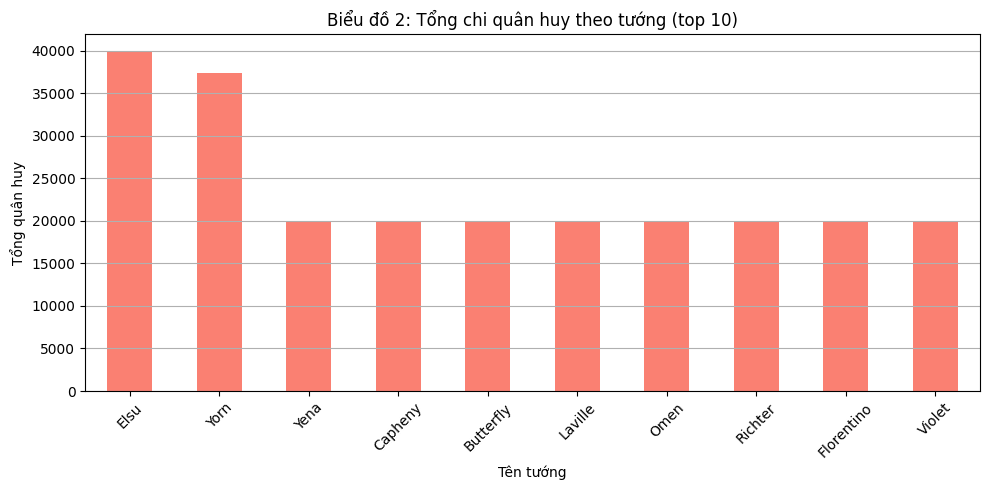

In [18]:
# Tính tổng chi theo tướng
price_by_hero = df.groupby("Tên tướng")["Giá quân huy"].sum().sort_values(ascending=False).head(10)

# Vẽ biểu đồ
plt.figure(figsize=(10, 5))
price_by_hero.plot(kind="bar", color="salmon")
plt.title("Biểu đồ 2: Tổng chi quân huy theo tướng (top 10)")
plt.xlabel("Tên tướng")
plt.ylabel("Tổng quân huy")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.tight_layout()
plt.show()


## Insight 3: Giá skin có sự phân bố không ổn định trong cùng một bậc  
## Insight 3: Price variation exists within the same skin tier**

**Phân tích:**  
- Skin bậc **SS** dao động từ **599 đến 899 quân huy** – chênh lệch gần 50%.  
- Một số skin cùng bậc nhưng khác biệt lớn về giá trị khiến người chơi khó định giá.

**Insight:**  
Việc định giá không nhất quán gây khó khăn cho người chơi trong việc đánh giá "mức xịn" của skin, có thể ảnh hưởng đến quyết định chi tiêu.

**Recommendation:**  
- Thiết lập dải giá cố định theo từng bậc skin.  
- Cung cấp lịch sử giá hoặc “thẻ định giá lại” cho skin SS cũ.  
- Ưu tiên công khai giá trực tiếp thay vì gacha ẩn giá trị.

---

**Analysis:**  
- SS skins range from **599 to 899 quân huy**, creating up to 50% variance within the same tier.  
- Players may struggle to understand the value scale among similarly tiered cosmetics.

**Insight:**  
Inconsistent pricing weakens the perception of skin value and reduces pricing transparency, possibly frustrating buyers.

**Recommendation:**  
- Establish fixed price ranges per skin tier.  
- Provide pricing history or rebalance tokens for legacy SS skins.  
- Promote direct pricing models instead of hidden gacha structures.


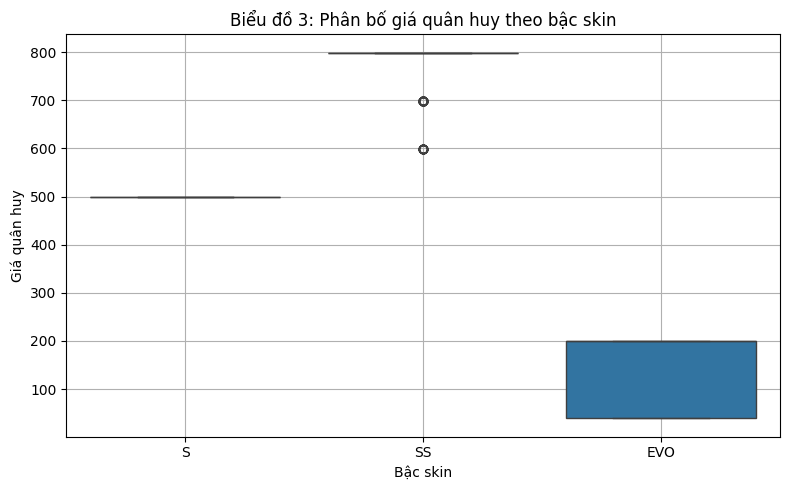

In [19]:
# Boxplot giá theo bậc
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="Bậc", y="Giá quân huy", order=["S", "SS", "EVO"])
plt.title("Biểu đồ 3: Phân bố giá quân huy theo bậc skin")
plt.xlabel("Bậc skin")
plt.ylabel("Giá quân huy")
plt.grid(True)
plt.tight_layout()
plt.show()
